# Placeholders
resource used: http://learningtensorflow.com/lesson4/

### 1. Simple use of placeholders

In [3]:
import tensorflow as tf

x = tf.placeholder("int32", None)
y = tf.Variable("int32",None)

y = x * 2

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    result = session.run(y, feed_dict={x: [1,2,3]})
    print(result)

[2 4 6]


### 2. Specify dimension of the placeholder

In [4]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


### 3. Placeholder and images

(3000, 3685, 3)


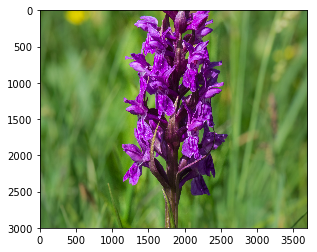

In [9]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

# First, load the image again
dir_path = os.getcwd()
filename = dir_path + "\\MarshOrchid.jpg"
raw_image_data = mpimg.imread(filename)

image = tf.placeholder("uint8", [None, None, 3])
slice = tf.slice(image, [1000, 0, 0], [3000, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()

### 4. Split image into 4 corners and stitch back

In [ ]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

# First, load the image again
dir_path = os.getcwd()
filename = dir_path + "\\MarshOrchid.jpg"
raw_image_data = mpimg.imread(filename)
h,w,d = raw_image_data.shape

image = tf.placeholder("uint8", [None, None, 3])

#### Operation: slicing

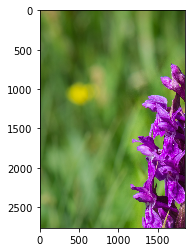

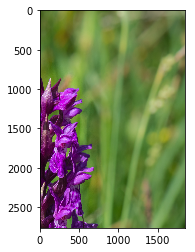

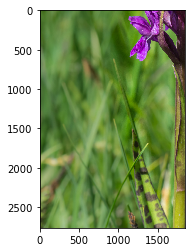

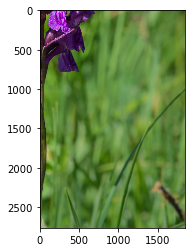

In [14]:
slice_1 = tf.slice(image, [0, 0, 0], [round(h/2), round(w/2), -1])
slice_2 = tf.slice(image, [0, (round(w/2)+1), 0], [round(h/2), -1, -1])
slice_3 = tf.slice(image, [(round(h/2)+1), 0, 0], [-1, round(w/2), -1])
slice_4 = tf.slice(image, [(round(h/2)+1), (round(w/2)+1), 0], [-1, -1, -1])

with tf.Session() as session:
    result_1 = session.run(slice_1, feed_dict={image: raw_image_data}) # top-left
    result_2 = session.run(slice_2, feed_dict={image: raw_image_data}) # top-right
    result_3 = session.run(slice_3, feed_dict={image: raw_image_data}) # bottom-left
    result_4 = session.run(slice_4, feed_dict={image: raw_image_data}) # bottom-right

plt.imshow(result_1)
plt.show()

plt.imshow(result_2)
plt.show()

plt.imshow(result_3)
plt.show()

plt.imshow(result_4)
plt.show()

#### Operation: Stitching

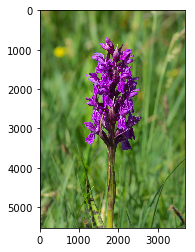

In [16]:
stitch_1 = tf.concat([result_1,result_2], axis = 1) # top half
stitch_2 = tf.concat([result_3,result_4], axis = 1) # bottom half
stitch_3 = tf.concat([stitch_1,stitch_2], axis = 0) # complete

with tf.Session() as session:
    res_1 = session.run(stitch_3)
    
plt.imshow(res_1)
plt.show()